## Multiple linear regression

In [95]:
# Reading and understanding the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [96]:
ls

Housing.csv
Multiple+Linear+Regression+-+Housing+Case+Study.ipynb
Untitled.ipynb


In [97]:
housing_data = pd.read_csv("Housing.csv")

In [98]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [99]:
housing_data.shape

(545, 13)

In [100]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              544 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [101]:
housing_data.isnull().sum()

price               0
area                1
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [102]:
housing_data['area'] = housing_data['area'].replace(np.nan, 8100)

In [103]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


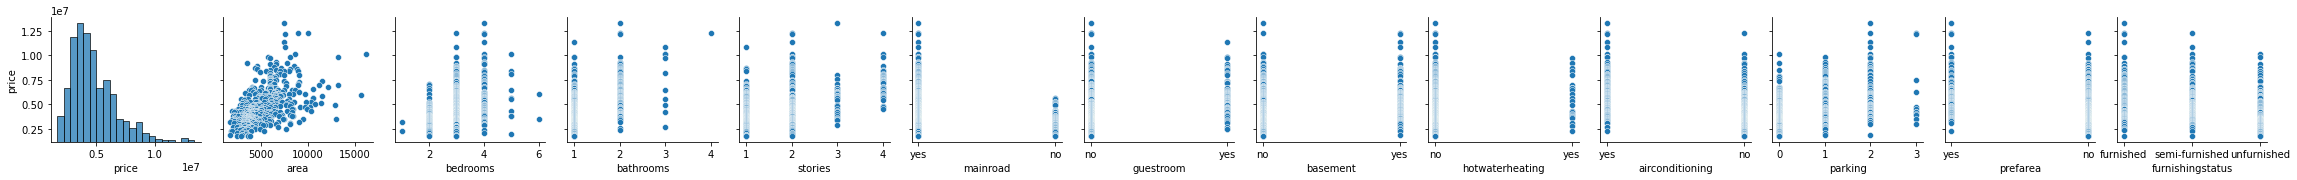

In [104]:
# Visualization of data numerical variable
sns.pairplot(x_vars=housing_data.columns,y_vars='price',data=housing_data)

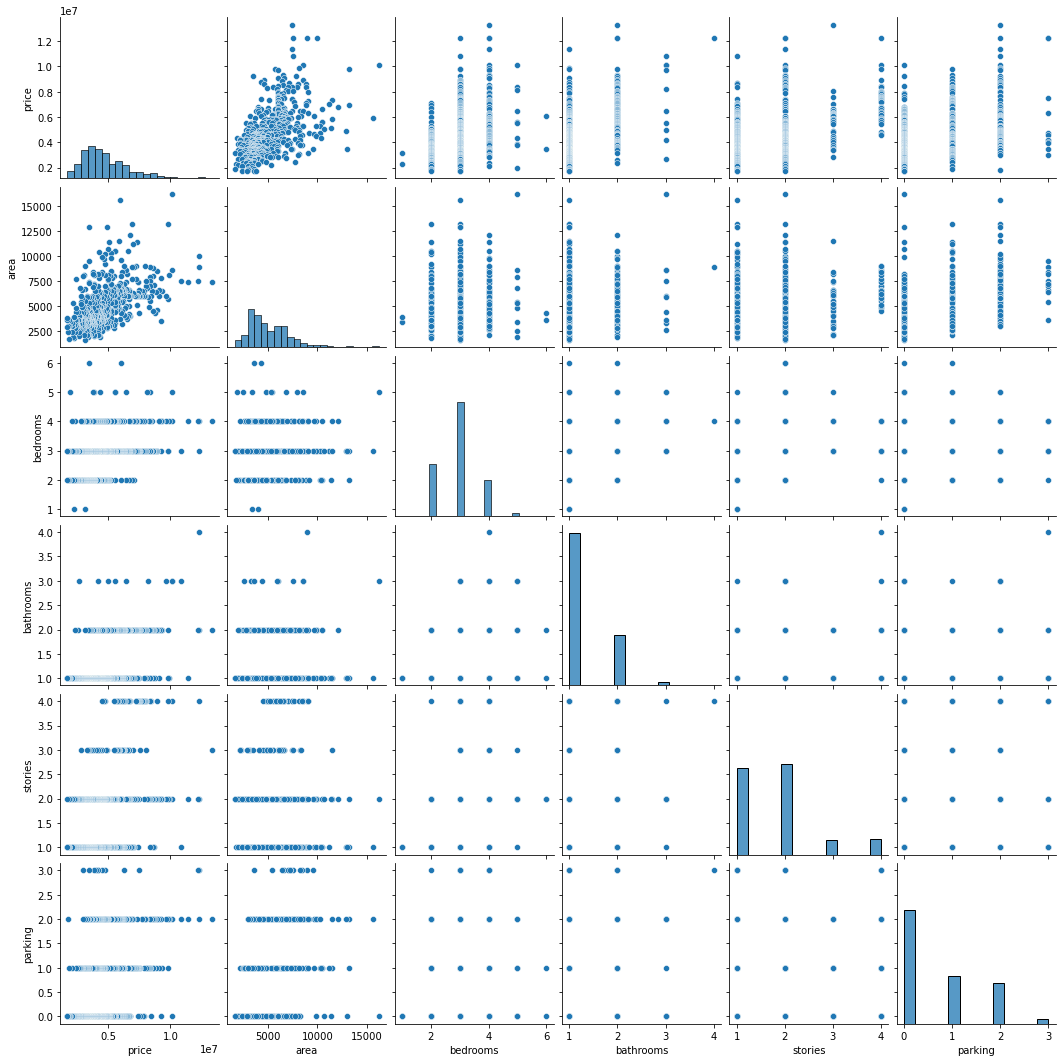

In [105]:
# Visualization of all numerical variables 
sns.pairplot(housing_data)

In [106]:
# Visualization of categorical variable

In [107]:
# All categorical variable
housing_data_categorical = housing_data.columns[housing_data.dtypes == 'object']
housing_data_categorical

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

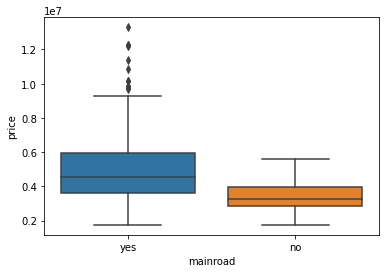

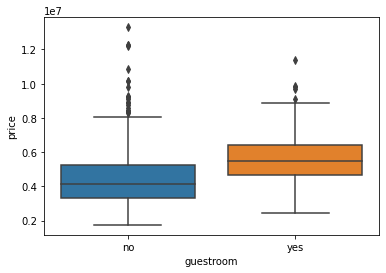

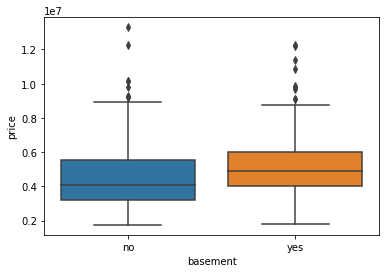

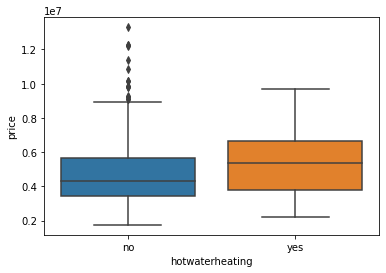

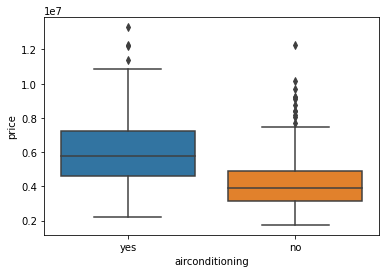

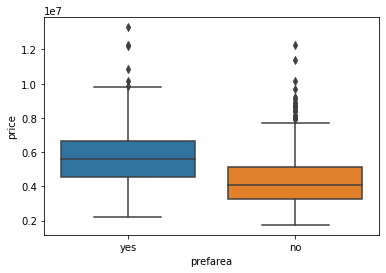

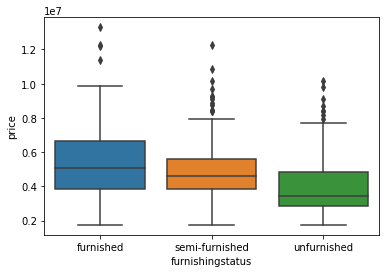

In [108]:
# plt.figure(figsize=(5,4))
for housing_category in housing_data_categorical:
    sns.boxplot(x=housing_category, y='price', data=housing_data)
    plt.show()

In [109]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
# Changing yes to 1 and no to 0 in some datapoint given in above sheet.
housing_column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for hou in housing_column:
    housing_data[hou] = housing_data[hou].apply(lambda x: 0 if x=='no' else 1)
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,furnished
